<a href="https://colab.research.google.com/github/18wh1a1240/ML-Assignments-WISE/blob/main/Poker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/poker-hand-training-true.data')
data

,1,10,1.1,11,1.2,13,1.3,12,1.4,1.5,9
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9
4,1,2,1,4,1,5,1,3,1,6,8
...,...,...,...,...,...,...,...,...,...,...,...
25004,3,9,2,6,4,11,4,12,2,4,0
25005,4,1,4,10,3,13,3,4,1,10,1
25006,2,1,2,10,4,4,4,1,4,13,1
25007,2,12,4,3,1,10,1,12,4,9,1


In [ ]:
data.columns = ['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5','Class']
data

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9
4,1,2,1,4,1,5,1,3,1,6,8
...,...,...,...,...,...,...,...,...,...,...,...
25004,3,9,2,6,4,11,4,12,2,4,0
25005,4,1,4,10,3,13,3,4,1,10,1
25006,2,1,2,10,4,4,4,1,4,13,1
25007,2,12,4,3,1,10,1,12,4,9,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25009 entries, 0 to 25008
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   S1      25009 non-null  int64
 1   C1      25009 non-null  int64
 2   S2      25009 non-null  int64
 3   C2      25009 non-null  int64
 4   S3      25009 non-null  int64
 5   C3      25009 non-null  int64
 6   S4      25009 non-null  int64
 7   C4      25009 non-null  int64
 8   S5      25009 non-null  int64
 9   C5      25009 non-null  int64
 10  Class   25009 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB


In [ ]:
features = data.drop(['Class'], axis=1)
target = data['Class']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.35, random_state=42)

In [ ]:
logreg_model = LogisticRegression(max_iter=3000, solver='lbfgs')
logreg_model.fit(X_train, y_train)

train_pred = logreg_model.predict(X_train)
test_pred =  logreg_model.predict(X_test)

In [ ]:
print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 49.831%
Testing Accuracy: 50.183%


In [ ]:
k_range = range(1, 21)
train_acc = []
test_acc = []

for k in k_range:    
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    train_pred = knn_model.predict(X_train)
    test_pred =  knn_model.predict(X_test)

    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

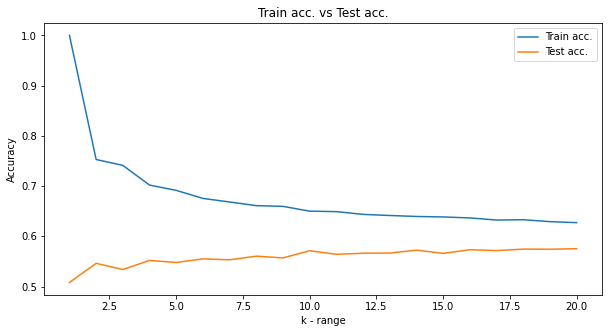

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, train_acc, label='Train acc.')
plt.plot(k_range, test_acc, label='Test acc.')
plt.legend()
plt.xlabel('k - range')
plt.ylabel('Accuracy')
plt.title('Train acc. vs Test acc.')
plt.show()

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)

train_pred = knn_model.predict(X_train)
test_pred =  knn_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 65.002%
Testing Accuracy: 57.128%
